# The Quantum Harmonic Oscillator 

Other ideas: Maybe a youtube video explaining the math? Pablo was really good at explaining it, and I feel like a youtube video presenting the math/matrix stuff could be really helpful for people who haven't encountered this kind of content before
I think that it is also helpful to present different options to doing certain things, like you don't have to use Galerkin projection. That was helpful for me to understand when I was confused
In Exact/High Fidelity Solver section, talk about analytical methods and how we can actually find the eigenvalue.

## Table of Contents
### Introduction to Quantum Harmonic Oscillator and Schrödinger Equation
### Dimensionality Reduction
### High Fidelity Solver
#### - Finite Difference Method
#### - Comparison to Exact
### Reduced Basic Method
#### - Reduced Coordinates
#### - SVD/Principal Components
#### - Galerkin Projection
#### - Compare Solutions 
### Conclusion

### Introduction to the Quantum Harmonic Oscillator and Schrödinger Equation
Insert introduction...what is the system...show pictures....what is Schrödinger Equation?....terms of HO equation...show matrix forms?

$$ (\frac{d^2}{dx^2} + \alpha x^2 - \lambda )\phi(x) = 0 $$

The first term is the second derivative, which can be expressed as a matrix. It describes the kinetic energy of the system. The second term is the potential energy of the system, and it is multiplied by some value alpha. Alpha is the harmonic parameter, and lambda is the eigenvalue. 

### Dimensionality Reduction 
In complicated physics systems, it isn't practical to ...... Time costly ..... expensive.... supercomputers.... reduce basis ... matrix before and after ....

### High Fidelity Solver
We need a high fidelity solver to.... The high fidelity is slow.... It has higher error... 

Here are the libraries we will use in the following code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy as sci
from scipy import optimize
import time as ti

We now must create the functions to represent the terms in the equation above. 
The first function is the second derivative, and it creates it in a matrix form. The next term creates the potential matrix. The third equation combines them both. 

In [2]:

def hf_second_derivative(xgrid):
    N = len(xgrid)
    dx = xgrid[1] - xgrid[0]

    # Generate the matrix for the second derivative using a five-point stencil
    main_diag = np.ones(N) * (-5.0 / 2 / dx**2)
    off_diag = np.ones(N - 1) * 4 / 3 / dx**2
    off_diag2 = np.ones(N - 2) * (-1.0 / (12 * dx**2))

    D2 = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(
      off_diag, k=-1) + np.diag(off_diag2, k=2) + np.diag(off_diag2, k=-2)

    return D2


In [3]:
def hf_potential(xgrid):
      return np.diag(xgrid**2)

In [4]:
def hf_sol(xgrid, alpha):
    d0 = hf_second_derivative(xgrid)
    v = hf_potential(xgrid)
    H = -d0 + alpha * v
    return H


We can determine the exact solutions of the quantum harmonic oscillator, because it isn't too complicated to solve from a mathematical standpoint. So, we can use the exact lambda function to determine the error in our programmed solutions. 

In [5]:
def getExactLambda(alpha):
  n = 0
  return 2 * (.5 + n) * np.sqrt(alpha / 1**2)

#### Finite Difference Method
Finite difference method discretizes the space and divides the wavefunction of the particle into some amount of points. We can use this to simplify the wavefunction and treat it as a collection of points. 

Below are some variables needed to apply this method. Firstly, numpy is used to create the space over which the wavefunction is discretized. Some alpha values are also established which will be used later on. 

In [6]:
x_max = 10.0
h = 10**(-1)
x = np.arange(-x_max, x_max + h, h)
N_grid = x.shape[0]
alphas = np.arange(0.5, 15.5, 0.5)
m = np.zeros((len(alphas), N_grid))

In [7]:
def timing(H, int):
  solveTime = []
  for i in range(int):
    time0 = time.time()
    evals, evects = np.linalg.eigh(H)
    time1 = time.time()
  solveTime.append(time1-time0)
  avg = sum(solveTime)/len(solveTime)
  return avg

def HO_creator(alpha, D2Mat, vpot):
  return -D2Mat + alpha * vpot

def HO_solver(H):
  evals, evects = np.linalg.eigh(H)
  solveTime = timing(H, 10)
  return evals, evects, solveTime


In [8]:
def create_functions(h):
  x_max = 10.0 
  x = np.arange(-x_max, x_max + h, h)
  D20 = hf_second_derivative(x)
  V0 = hf_potential(x)
  return D20, V0


In [9]:

h_list = [1/10, 1/20, 1/30]

htimes = []
herrors = []

i = 0
for h in h_list:
  D20, V0 = create_functions(h)
  for alpha in range(5, 105, 5):
    alpha = alpha/10
    
    # Used for error estimation
    exactEigenvalue = getExactLambda(alpha)
    
    H= HO_creator(alpha, D20, V0)
    evals, evects, t1me = HO_solver(H)
    # print('Time: %.3e s'%t1me)
  
    err = abs(((evals[0]-exactEigenvalue)/exactEigenvalue))
    # print('Relative error: %.3e'%err)
  
    htimes.append(t1me)
    herrors.append(err)


In [10]:

for i in range(len(alphas)):
    alpha_value = alphas[i]
    solutions_np = np.linalg.eigh(hf_sol(x, alpha_value))
    evals =  solutions_np[0]
    evects= solutions_np[1].T
    m[i] = evects[0] / np.linalg.norm(evects[0])*np.sign(evects[0][  int(len(x)/2)  ])
#     print("M")
#     print(m[i])


[-1.00000000e+01 -9.90000000e+00 -9.80000000e+00 -9.70000000e+00
 -9.60000000e+00 -9.50000000e+00 -9.40000000e+00 -9.30000000e+00
 -9.20000000e+00 -9.10000000e+00 -9.00000000e+00 -8.90000000e+00
 -8.80000000e+00 -8.70000000e+00 -8.60000000e+00 -8.50000000e+00
 -8.40000000e+00 -8.30000000e+00 -8.20000000e+00 -8.10000000e+00
 -8.00000000e+00 -7.90000000e+00 -7.80000000e+00 -7.70000000e+00
 -7.60000000e+00 -7.50000000e+00 -7.40000000e+00 -7.30000000e+00
 -7.20000000e+00 -7.10000000e+00 -7.00000000e+00 -6.90000000e+00
 -6.80000000e+00 -6.70000000e+00 -6.60000000e+00 -6.50000000e+00
 -6.40000000e+00 -6.30000000e+00 -6.20000000e+00 -6.10000000e+00
 -6.00000000e+00 -5.90000000e+00 -5.80000000e+00 -5.70000000e+00
 -5.60000000e+00 -5.50000000e+00 -5.40000000e+00 -5.30000000e+00
 -5.20000000e+00 -5.10000000e+00 -5.00000000e+00 -4.90000000e+00
 -4.80000000e+00 -4.70000000e+00 -4.60000000e+00 -4.50000000e+00
 -4.40000000e+00 -4.30000000e+00 -4.20000000e+00 -4.10000000e+00
 -4.00000000e+00 -3.90000

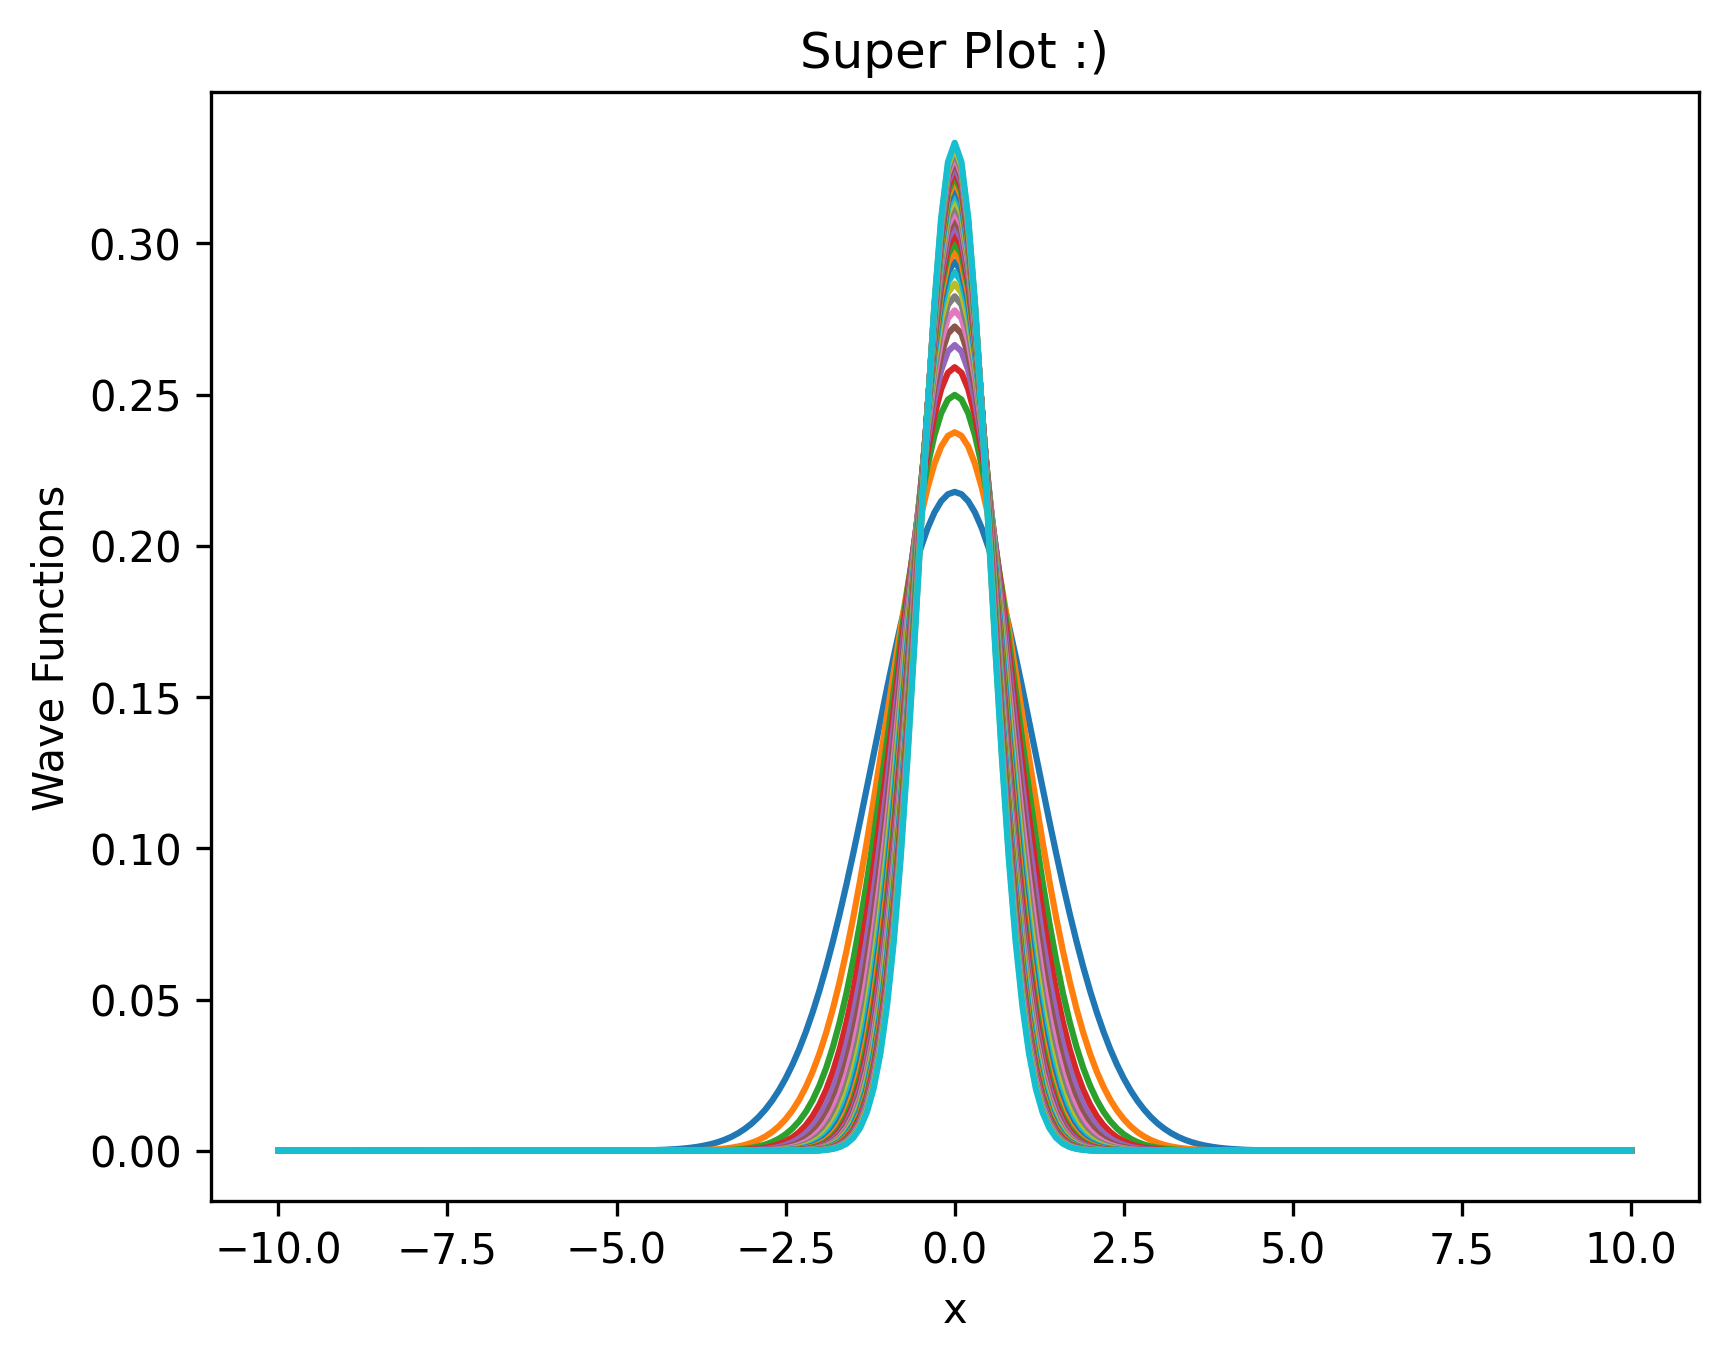

In [11]:
fig, ax = plt.subplots(dpi=300)
print(x)

for i in range(len(m)):
    # Plot data on the axis
    ax.plot(x, m[i], )

# Add title and labels
ax.set_title("Super Plot :)")
ax.set_xlabel("x")
ax.set_ylabel("Wave Functions")



# Show the plot
plt.show()

In [12]:
# Get rbm coordinates
U, sigma, Vh = np.linalg.svd(m)
components = 3
reduced_basis = Vh[:components]

reduced_basis = [reduced_basis[i]*np.sign(reduced_basis[i][  int(len(x)/2)  ]) for i in range(len(reduced_basis))]

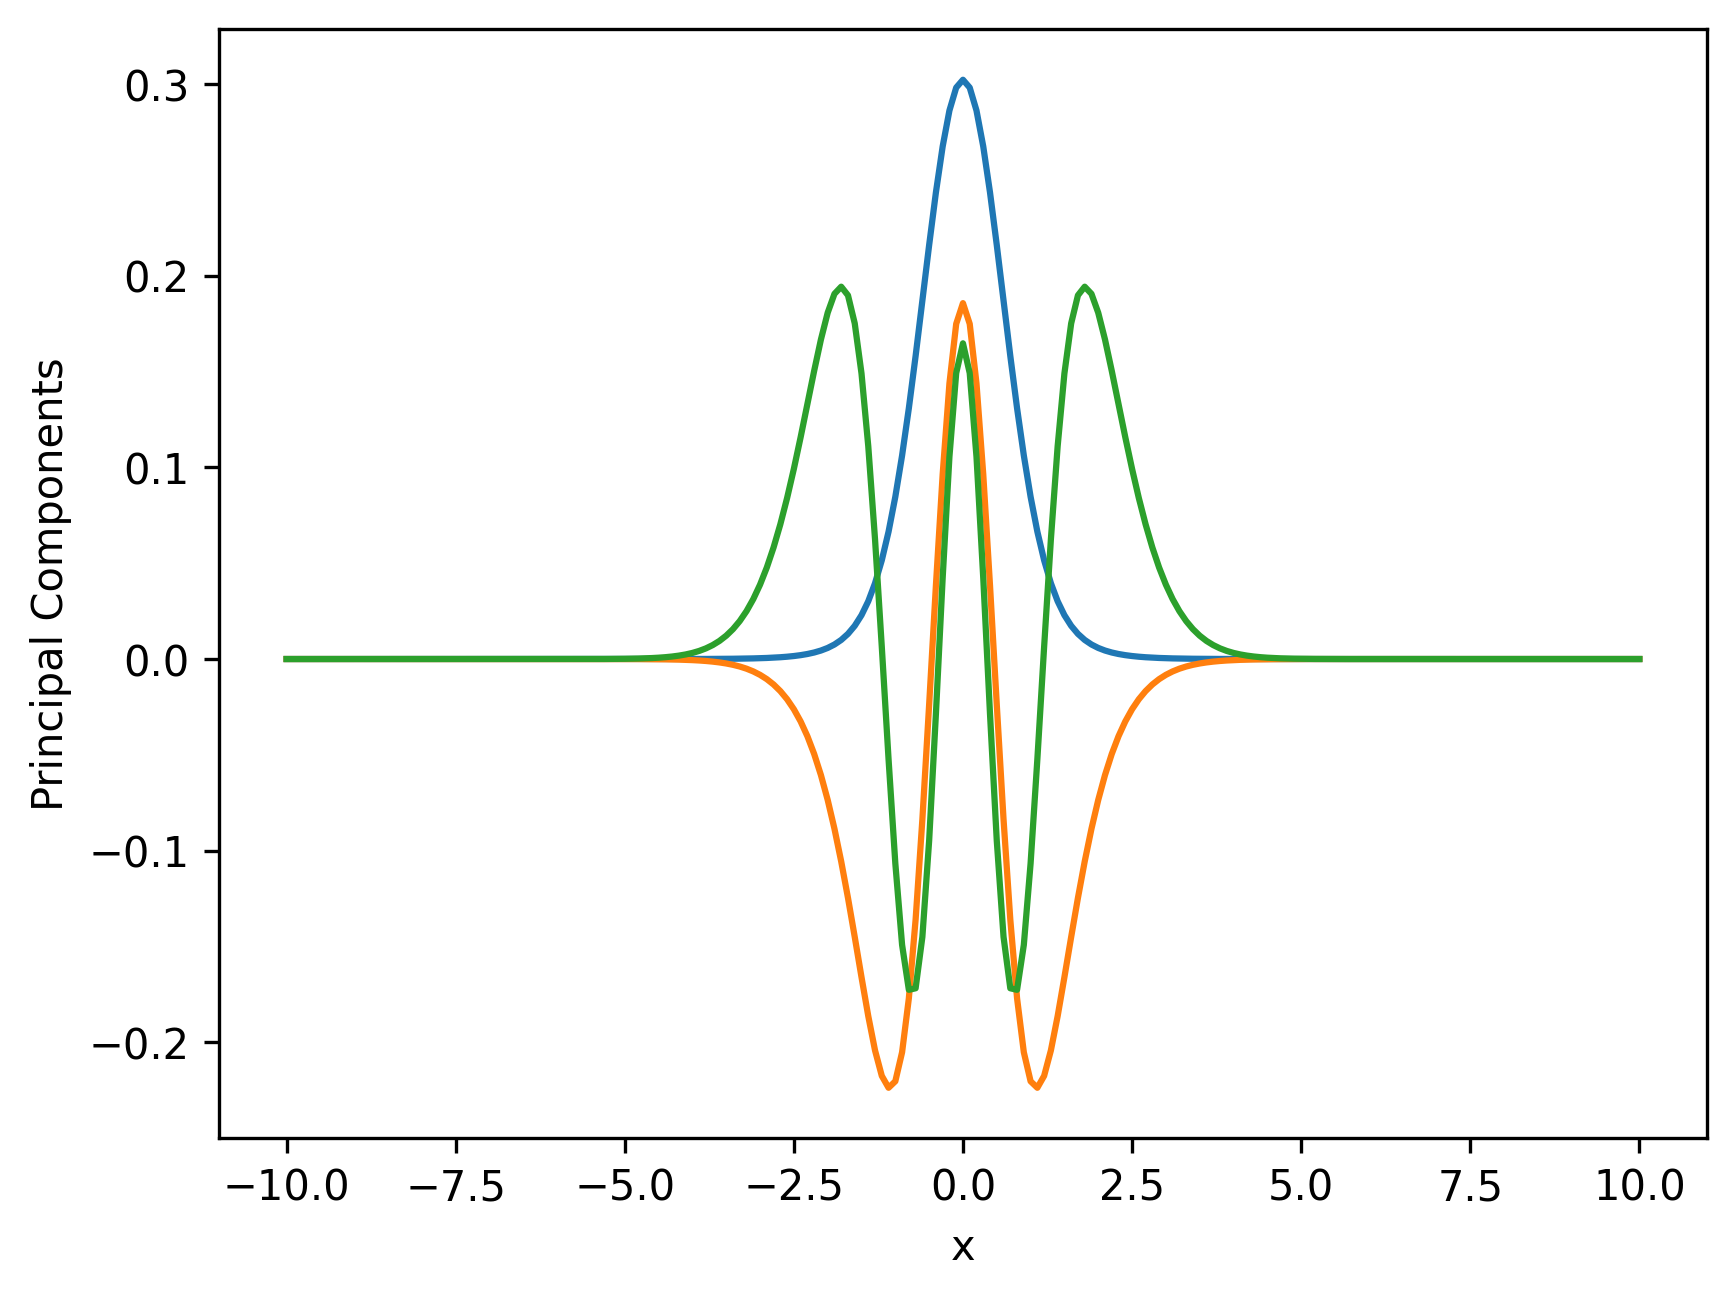

In [13]:
fig, ax = plt.subplots(dpi=300)


for i in range(len(reduced_basis)):
    # Plot data on the axis
    ax.plot(x, reduced_basis[i], )

# Add title and labels

ax.set_xlabel("x")
ax.set_ylabel("Principal Components")



# Show the plot
plt.show()

In [14]:

def getSystem(H, psi_array, phi_array):
  def system(a_vec):
      results = np.zeros(len(a_vec))
      results[-1] = -1
      for i in np.arange(0, len(a_vec) - 1, 1):
          for k in np.arange(0, len(a_vec) - 1, 1):
              results[i] += a_vec[k]*np.dot(psi_array[i],np.matmul(H,phi_array[k])) - \
              a_vec[-1]*a_vec[k]*np.dot(psi_array[i],phi_array[k])
      for k in np.arange(0, len(a_vec) - 1, 1):
          for kp in np.arange(0, len(a_vec) - 1, 1):
              results[-1] += a_vec[kp] * a_vec[k] * np.dot(psi_array[kp],
                                                         phi_array[k])
      print(results)
      print(len(results))
      return results
  
  print(system)
  return system


In [15]:
mass = 1.0
h = 10**(-1) 
l = np.zeros(len(alphas)+1)
l[0] = 1

In [16]:
print(l)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


In [17]:
def RBM(alpha_k):
  V = alpha_k * x**2
  dim = len(x)
  off_diag = np.zeros(dim)
  off_diag[1] = 1
  psi = m.copy()
  
  H = -1 * (-2 * np.identity(dim) + sci.linalg.toeplitz(off_diag)) / (mass * h**2) + np.diag(V)
  rbm_sol = np.zeros(len(H))
  # print("H" + str(H))

  time1 = ti.time()
  # Get system/coefficients 

  system = getSystem(H, psi, m)
  coefficients = sci.optimize.fsolve(system, l)
  time2 = ti.time()
  # Get time
  timeDif = time2-time1
  
  # Add all coefficients multiplied by the chosen basis functions
  for i in range(len(coefficients) - 1):
    rbm_sol += coefficients[i] * m[i]
  
  # Get eigenvalue
  print(f'Coeffecients a_k: {coefficients[:len(coefficients)-1]}')
  print(f'Appproximate lambda: {coefficients[-1]}')
  print(f'Exact lambda: {getExactLambda(alpha_k)}')
  print(f'lambda difference: {abs(getExactLambda(alpha_k)-  coefficients[-1])}')
  error = abs(getExactLambda(alpha_k)-  coefficients[-1])
  
  return timeDif, error


In [18]:
alpha_k = 15

In [19]:
V = alpha_k * x**2
dim = len(x)
off_diag = np.zeros(dim)
off_diag[1] = 1
psi = m.copy()


In [20]:

H = -1 * (-2 * np.identity(dim) + sci.linalg.toeplitz(off_diag)) / (mass * h**2) + np.diag(V)
rbm_sol = np.zeros(len(H))
print("H" + str(H))


H[[1700.   -100.      0.   ...    0.      0.      0.  ]
 [-100.   1670.15 -100.   ...    0.      0.      0.  ]
 [   0.   -100.   1640.6  ...    0.      0.      0.  ]
 ...
 [   0.      0.      0.   ... 1640.6  -100.      0.  ]
 [   0.      0.      0.   ... -100.   1670.15 -100.  ]
 [   0.      0.      0.   ...    0.   -100.   1700.  ]]


In [21]:

time1 = ti.time()
# Get system/coefficients 
system = getSystem(H, psi, m)
print(system)


<function getSystem.<locals>.system at 0x7f3ed98bfc70>
<function getSystem.<locals>.system at 0x7f3ed98bfc70>


In [22]:
coefficients = sci.optimize.fsolve(system, l)
time2 = ti.time()
# Get time
timeDif = time2-time1


[10.95981084  9.13207189  8.06076274  7.32302613  6.77090084  6.33576627
  5.98044411  5.68265812  5.42807696  5.20697703  5.01248221  4.83956596
  4.68445235  4.54423955  4.41665397  4.2998843   4.19246653  4.09320222
  4.0010992   3.91532782  3.83518804  3.76008435  3.68950645  3.62301406
  3.56022502  3.5008057   3.44446333  3.39093974  3.3400063   3.29145961
  0.        ]
31
[10.95981084  9.13207189  8.06076274  7.32302613  6.77090084  6.33576627
  5.98044411  5.68265812  5.42807696  5.20697703  5.01248221  4.83956596
  4.68445235  4.54423955  4.41665397  4.2998843   4.19246653  4.09320222
  4.0010992   3.91532782  3.83518804  3.76008435  3.68950645  3.62301406
  3.56022502  3.5008057   3.44446333  3.39093974  3.3400063   3.29145961
  0.        ]
31
[10.95981084  9.13207189  8.06076274  7.32302613  6.77090084  6.33576627
  5.98044411  5.68265812  5.42807696  5.20697703  5.01248221  4.83956596
  4.68445235  4.54423955  4.41665397  4.2998843   4.19246653  4.09320222
  4.0010992   3.9

[1.09598109e+01 9.13207197e+00 8.06076282e+00 7.32302620e+00
 6.77090091e+00 6.33576634e+00 5.98044419e+00 5.68265819e+00
 5.42807703e+00 5.20697710e+00 5.01248228e+00 4.83956603e+00
 4.68445241e+00 4.54423962e+00 4.41665403e+00 4.29988436e+00
 4.19246659e+00 4.09320228e+00 4.00109926e+00 3.91532788e+00
 3.83518810e+00 3.76008441e+00 3.68950650e+00 3.62301412e+00
 3.56022508e+00 3.50080576e+00 3.44446338e+00 3.39093980e+00
 3.34000635e+00 3.29145966e+00 2.81519308e-08]
31
[1.09598109e+01 9.13207197e+00 8.06076282e+00 7.32302620e+00
 6.77090091e+00 6.33576634e+00 5.98044418e+00 5.68265819e+00
 5.42807703e+00 5.20697710e+00 5.01248228e+00 4.83956603e+00
 4.68445241e+00 4.54423962e+00 4.41665403e+00 4.29988436e+00
 4.19246659e+00 4.09320228e+00 4.00109926e+00 3.91532788e+00
 3.83518810e+00 3.76008441e+00 3.68950650e+00 3.62301412e+00
 3.56022508e+00 3.50080576e+00 3.44446338e+00 3.39093980e+00
 3.34000635e+00 3.29145966e+00 2.79344650e-08]
31
[1.09598109e+01 9.13207197e+00 8.06076282e+00 

/home/codespace/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [23]:

# Add all coefficients multiplied by the chosen basis functions
for i in range(len(coefficients) - 1):
  rbm_sol += coefficients[i] * m[i]
# norm = np.linalg.norm(rbm_sol)


In [24]:

# Get eigenvalue
print(f'Coeffecients a_k: {coefficients[:len(coefficients)-1]}')
print(f'Appproximate lambda: {coefficients[-1]}')
print(f'Exact lambda: {getExactLambda(alpha_k)}')
print(f'lambda difference: {abs(getExactLambda(alpha_k)-  coefficients[-1])}')


Coeffecients a_k: [-5.96242194e-03  1.45975397e-01 -6.60776487e-01 -2.09586695e-01
  4.66490231e+00 -4.19334342e+00 -3.48833340e+00 -1.21184886e-01
  3.84181410e+00  4.66633773e-01  9.83965487e+00 -7.49284793e+00
 -6.73091646e+00  1.53926510e+00  5.72001053e+00 -7.62917885e+00
  1.74128590e+00 -1.95512199e+00  2.04137313e+00  3.51991747e+00
 -3.39719240e-01 -2.17008796e-02  6.98877539e+00 -1.34430224e+00
 -6.84816601e+00  7.04732203e-02 -1.62045560e+00 -3.12668485e+00
  5.14240342e+00  1.06599366e+00]
Appproximate lambda: 3.863585485981332
Exact lambda: 3.872983346207417
lambda difference: 0.009397860226084909


In [25]:

errors = []
times = []

In [26]:
for alpha in range(5, 105, 5):
   alpha = alpha/10
   time, error = RBM(alpha)
   errors.append(error)
   times.append(time)


<function getSystem.<locals>.system at 0x7f3ed98be8c0>
[0.70679446 0.70141943 0.69356577 0.68605061 0.67919796 0.67298413
 0.66732874 0.6621515  0.65738341 0.65296741 0.64885668 0.64501272
 0.64140363 0.6380028  0.63478779 0.6317396  0.62884196 0.62608084
 0.62344409 0.62092111 0.61850259 0.61618032 0.613947   0.61179616
 0.60972199 0.60771928 0.60578333 0.6039099  0.60209511 0.60033547
 0.        ]
31
[0.70679446 0.70141943 0.69356577 0.68605061 0.67919796 0.67298413
 0.66732874 0.6621515  0.65738341 0.65296741 0.64885668 0.64501272
 0.64140363 0.6380028  0.63478779 0.6317396  0.62884196 0.62608084
 0.62344409 0.62092111 0.61850259 0.61618032 0.613947   0.61179616
 0.60972199 0.60771928 0.60578333 0.6039099  0.60209511 0.60033547
 0.        ]
31
[0.70679446 0.70141943 0.69356577 0.68605061 0.67919796 0.67298413
 0.66732874 0.6621515  0.65738341 0.65296741 0.64885668 0.64501272
 0.64140363 0.6380028  0.63478779 0.6317396  0.62884196 0.62608084
 0.62344409 0.62092111 0.61850259 0.616180

[7.06794473e-01 7.01419443e-01 6.93565785e-01 6.86050625e-01
 6.79197976e-01 6.72984145e-01 6.67328750e-01 6.62151507e-01
 6.57383417e-01 6.52967417e-01 6.48856693e-01 6.45012733e-01
 6.41403646e-01 6.38002808e-01 6.34787806e-01 6.31739616e-01
 6.28841969e-01 6.26080851e-01 6.23444105e-01 6.20921127e-01
 6.18502606e-01 6.16180330e-01 6.13947016e-01 6.11796176e-01
 6.09722006e-01 6.07719296e-01 6.05783346e-01 6.03909907e-01
 6.02095123e-01 6.00335481e-01 2.95805315e-08]
31
[7.06794473e-01 7.01419443e-01 6.93565785e-01 6.86050626e-01
 6.79197977e-01 6.72984147e-01 6.67328751e-01 6.62151509e-01
 6.57383419e-01 6.52967419e-01 6.48856694e-01 6.45012734e-01
 6.41403648e-01 6.38002810e-01 6.34787808e-01 6.31739618e-01
 6.28841971e-01 6.26080853e-01 6.23444107e-01 6.20921129e-01
 6.18502608e-01 6.16180332e-01 6.13947018e-01 6.11796178e-01
 6.09722008e-01 6.07719298e-01 6.05783348e-01 6.03909909e-01
 6.02095125e-01 6.00335483e-01 2.92523490e-08]
31
[7.06794473e-01 7.01419443e-01 6.93565786e-01 

/home/codespace/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


[1.06034677e+00 9.92131600e-01 9.47607063e-01 9.14911854e-01
 8.89256699e-01 8.68252498e-01 8.50539628e-01 8.35272429e-01
 8.21890095e-01 8.10002235e-01 7.99326542e-01 7.89652503e-01
 7.80819123e-01 7.72700631e-01 7.65196988e-01 7.58227368e-01
 7.51725579e-01 7.45636764e-01 7.39914975e-01 7.34521362e-01
 7.29422798e-01 7.24590818e-01 7.20000793e-01 7.15631279e-01
 7.11463493e-01 7.07480900e-01 7.03668867e-01 7.00014388e-01
 6.96505857e-01 6.93132869e-01 2.92523490e-08]
31
[1.06034677e+00 9.92131600e-01 9.47607063e-01 9.14911854e-01
 8.89256700e-01 8.68252499e-01 8.50539629e-01 8.35272430e-01
 8.21890096e-01 8.10002236e-01 7.99326543e-01 7.89652504e-01
 7.80819124e-01 7.72700633e-01 7.65196989e-01 7.58227369e-01
 7.51725580e-01 7.45636765e-01 7.39914976e-01 7.34521363e-01
 7.29422799e-01 7.24590819e-01 7.20000795e-01 7.15631281e-01
 7.11463495e-01 7.07480901e-01 7.03668868e-01 7.00014390e-01
 6.96505858e-01 6.93132871e-01 2.89375483e-08]
31
[1.06034676e+00 9.92131600e-01 9.47607064e-01 

In [27]:
print(times)
print(errors)
print(htimes)
print(herrors)

[7.272607326507568, 7.362137317657471, 10.602439641952515, 7.275723457336426, 3.002964973449707, 9.216405868530273, 10.380826711654663, 12.557653427124023, 8.67715072631836, 11.845996618270874, 17.48580574989319, 11.004757165908813, 17.884111166000366, 5.737389326095581, 6.362915992736816, 5.0743749141693115, 6.535237550735474, 7.538605690002441, 9.759706020355225, 7.784344673156738]
[0.0003126382914171444, 0.0006253913565187341, 0.0009382192780351684, 0.001251107797462625, 0.001564048690265496, 0.0018770363902655962, 0.002190066769548693, 0.0025031367888252998, 0.002816243818294595, 0.0031293857368157596, 0.003442560832662256, 0.003755767514175723, 0.004069004693635581, 0.0043822706413645385, 0.004695564792593032, 0.00500888610608019, 0.005322233638903828, 0.0056356061025488735, 0.005949004538789104, 0.006262426559090706]
[0.005005359649658203, 0.004515409469604492, 0.005034446716308594, 0.00443577766418457, 0.004408597946166992, 0.009197473526000977, 0.0043392181396484375, 0.01960229

In [28]:
maxT = max(htimes) + 10
minT = min(times) - 10
maxEr = max(errors) + 10
minEr = min(herrors) - 10



/tmp/ipykernel_2078/4076224275.py:7: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  catAx.set(xscale='log',yscale='log',
/tmp/ipykernel_2078/4076224275.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  catAx.set(xscale='log',yscale='log',


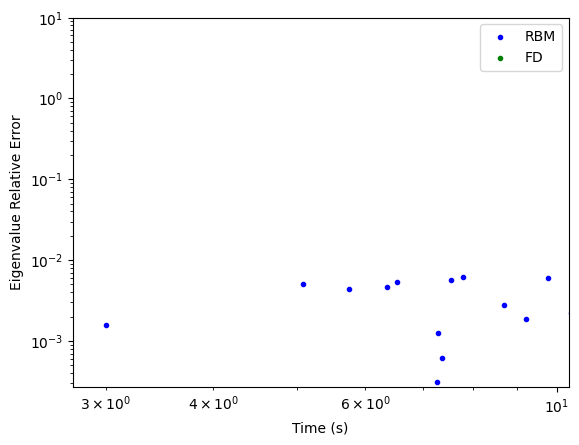

In [29]:
catFig, catAx = plt.subplots()

# Blue is RBM
catAx.scatter(times,errors,color='blue',
               marker='.',label='RBM')

catAx.set(xscale='log',yscale='log',
           xlabel='Time (s)',ylabel='Eigenvalue Relative Error',
           xlim=(minT, maxT),ylim=(minEr,maxEr))
catAx.scatter(htimes,herrors,color='green',
              marker='.',label='FD')

plt.legend()
plt.show()